# Hyperparameter tuning

In this project we will attempt to improve on an XGBoost model built in a previous project. To put this project in context we have duplicated the earlier project here and added the Hyperparameter tuning section at the bottom. You can skip the EDA and original model building to Step 4 where you can find the Section for Hyperparameter tuning.

## Step 1: Imports

In [77]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

import pickle
pd.set_option('display.max_columns', None)

#### Load the dataset

In [78]:
# load data
airline_df = pd.read_csv(r"C:\Users\Ghost\Desktop\project_files\Files\Invistico_Airline.csv")

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [79]:
airline_df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [80]:
airline_df.shape

(129880, 22)

Generate summary statistics using the `describe()` method.

In [81]:
airline_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Check summary information using the `info()` method.

In [82]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

## Step 2: Data exploration, data cleaning, and model preparation

Change column names to lower case and replace space with underscore

In [83]:
# change column names to lower case
airline_df.columns = airline_df.columns.str.lower()

# replace space with underscore in column names
airline_df.columns = airline_df.columns.str.replace(' ', '_')

# confirm changes
airline_df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Check value count for categorical features 

In [84]:
airline_df['type_of_travel'].value_counts()

type_of_travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [85]:
airline_df['class'].value_counts()

class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [86]:
airline_df['customer_type'].value_counts()

customer_type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Check class balance for target variable (`satisfaction`)

In [87]:
round(airline_df['satisfaction'].value_counts(normalize = True)  * 100, 2)

satisfaction
satisfied       54.73
dissatisfied    45.27
Name: proportion, dtype: float64

our target variable has a good balance with satisfied passengers representing 54.74% of our dataset and unsatisfied passengers making up the remaining 45.26%

Check for missing values using the `isna()` method

In [88]:
airline_df.isna().sum()

satisfaction                           0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

only arrival_delay_in_minutes has missing values, totalling 393 observations. This is a very small percentage of our dataset so we can remove the rows with missing values

In [89]:
# drop missing values
airline_df = airline_df.dropna(axis = 0)

# confirm changes 
airline_df.isna().sum()

satisfaction                         0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

Check for duplicates using the `duplicated()` method

In [90]:
airline_df.duplicated().sum()

0

Usually, at this point in our EDA process we would check the dataset for outliers, but considering tree based models (model used in this project) are not affected by outliers, we can skip this step

### Encode the data

Four columns (`satisfaction`, `customer_type`, `type_of_travel`, `class`) are the pandas dtype object. Random Forest need numeric columns. We must convert these columns to a numeric dtypes if we want to use them in our model. There are a number of ways to do this but we will use `np.where()` function for our target variable `satisfaction` and `pd.get_dummies` for the rest of our categorical independent variables.

In [91]:
# encode data 

# satisfaction
airline_df['satisfaction'] = np.where(airline_df['satisfaction'] == 'satisfied', 1, 0).astype(np.int64)

# customer_type, type_of_travel, and class
airline_df = pd.get_dummies(airline_df, columns = ['customer_type', 'type_of_travel', 'class'], drop_first = True, dtype = np.int64)

#confirm_changes
airline_df.head(10) 

,satisfaction,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0
5,1,30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,0,1,1,0
6,1,66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0,0,1,1,0
7,1,10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,0,1,1,0
8,1,56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,0,1,0,0
9,1,22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0,0,1,1,0


also check dtypes for new columns

In [92]:
airline_df.dtypes

satisfaction                           int64
age                                    int64
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
customer_type_disloyal Customer        int64
type_of_travel_Personal Travel         int64
class_Eco                              int64
class_Eco 

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [110]:
# separate the dataset into labels (y) and features (x).
y = airline_df['satisfaction']
x = airline_df.drop('satisfaction', axis = 1)

In [94]:
# create training, testing and validation data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Step 3: Model building

fit and test an XGBoost model

In [95]:
# instantiate xgboost classifier
xgboost = XGBClassifier(objective = 'binary:logistic', random_state = 0)

# fit model
xgb = xgboost.fit(x_train, y_train)

# get predictions 
xgb_pred = xgb.predict(x_test)

### Print model's accuracy, precision, recall, and F1 score.

In [112]:
# display evaluation metrices
accuracy_1 = round(accuracy_score(y_test, xgb_pred) * 100, 2)
precision_1 = round(precision_score(y_test, xgb_pred) * 100, 2)
recall_1 = round(recall_score(y_test, xgb_pred) * 100, 2)
f1_1 = round(f1_score(y_test, xgb_pred) * 100, 2)

print( f' Accuracy:  {accuracy_1}%')
print( f' Precision: {precision_1}%')
print( f' Recall:    {recall_1}%')
print( f' F1-Score:  {f1_1}%')

 Accuracy:  95.37%
 Precision: 96.54%
 Recall:    94.95%
 F1-Score:  95.74%


## Step 4:  Hyperparameter Tuning

Hyperparameter tuning is the process of selecting the optimal values for a  model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate or number of estimators.

The goal of hyperparameter tuning is to find the parameter values that lead to the best performance.

### Define the parameters for hyperparameter tuning

To identify suitable parameters for our `XGBoost` model, we must first define the parameters for hyperparameter tuning. 

**Note:** In our bid to improve model performance we should always consider the resources that go into the process (time and computational cost). We should seek to get the best performing model we can while properly managing resources. Balancing the scales so to speak. At some point the trade off between computational cost and model optimization might not be worth the entire process. This means hyperparameter tuning requires a level of expertise because there is no guarantee of optimal or improved performance.

The technique used to search for best parameters is also important. For example between the two most commonly used techniques GridSearchCV and RandomSearchCV, the former exhaustively evaluates the model for every possible combination of the range of values and parameters specified. This means a higher computational cost but with a sure hit result of the best parameter combination. RandomSearchCv on the other hand randomly selects values for every iteration from the range of values provided. This means it does not evaluate every single combination, producing results faster and reducing computational cost. But this also means the resulting 'best parameter' may not necessarily be the actual best paramater for the particular parameters specified (unlike GridSearchCV that exhausts every possible combination). Deciding which to use depends on the model requirements and available resources.

For this short project we will consider a more limited range for each parameter to allow for timely iteration and model training.
Specifically, we define a range of values for `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

In [97]:
# define parameters for tuning
cv_params = {'max_depth':[3,6,9],
             'min_child_weight':[3,5,7],
             'learning_rate':[0.1,0.2,0.3],
             'n_estimators':[20,50,100],
             'subsample': [0.7],
             'colsample_bytree': [0.7]
            }

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. Set a list of evaluation metrices called `scoring`

In [98]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

### Construct the GridSearch cross-validation 
For this project we will use the GridSearch technique since our range of values for each parameter are not too large and should not take too long to fit the model 

In [99]:
# construct GridSearch.
from sklearn.model_selection import GridSearchCV
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv=5, refit='f1')

### Fit the GridSearch model to training data

The GridSearch may take long depending on the ranges specified for each parameter, tweaking the ranges and number of estimators may help reduce run time where necessary.

In [38]:
%%time
# fit the GridSearch model to training data

xgb_cv = xgb_cv.fit(x_train, y_train)

CPU times: total: 19min 3s
Wall time: 6min 50s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 6, 9], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [20, 50, 100], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

### Print best parameters

In [107]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.7}

In order to avoid fitting our model over and over we can Save the model for reference using `pickle`

In [48]:
# use `pickle` to save the trained model.
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

## Step 5: Results and evaluation

Get predictions

In [ ]:
xgb_cv_pred = xgb_cv.predict(x_test)

### Print model's accuracy, precision, recall, and F1 score.

In [104]:
# display evaluation metrices
accuracy = round(accuracy_score(y_test, xgb_cv_pred) * 100, 2)
precision = round(precision_score(y_test, xgb_cv_pred) * 100, 2)
recall = round(recall_score(y_test, xgb_cv_pred) * 100, 2)
f1 = round(f1_score(y_test, xgb_cv_pred) * 100, 2)

print( f' Accuracy:  {accuracy}%')
print( f' Precision: {precision}%')
print( f' Recall:    {recall}%')
print( f' F1-Score:  {f1}%')

 Accuracy:  95.59%
 Precision: 96.87%
 Recall:    95.03%
 F1-Score:  95.94%


- The accuracy score for this model is 95.59%.
- The model shows a precision score of 96.87%, suggesting the model is very good at predicting true positives. This means the model correctly predicts whether the airline passenger will be satisfied
- The recall score of 95.03% is also very good. This means that the model does a good job of correctly identifying dissatisfied passengers within the dataset
- The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 95.94%, which suggests very strong predictive power in this model.

### Plot Confusion Matrix

A **confusion matrix** helps to create a visual representation of the components feeding into the metrices above.

Create a confusion matrix based on our predicted values for the test set.

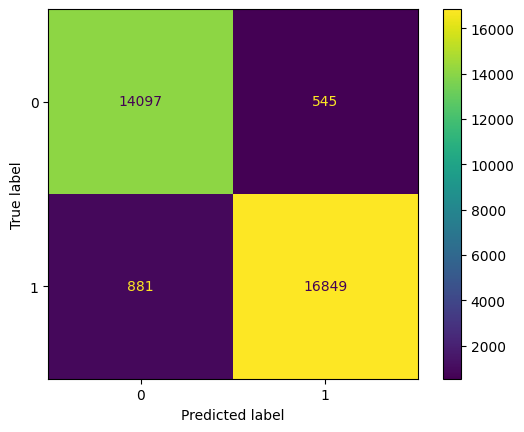

In [108]:
# construct and display confusion matrix.
cm = confusion_matrix(y_test, xgb_cv_pred, labels = xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot()
plt.show()

The concentration of true positives and true negatives stands out relative to false positives and false negatives, respectively. This ratio explains why the accuracy, recall, precision and f1 scores were so high.

### Visualize most important features

use XGBoost `plot_importance()` function to plot feature importance

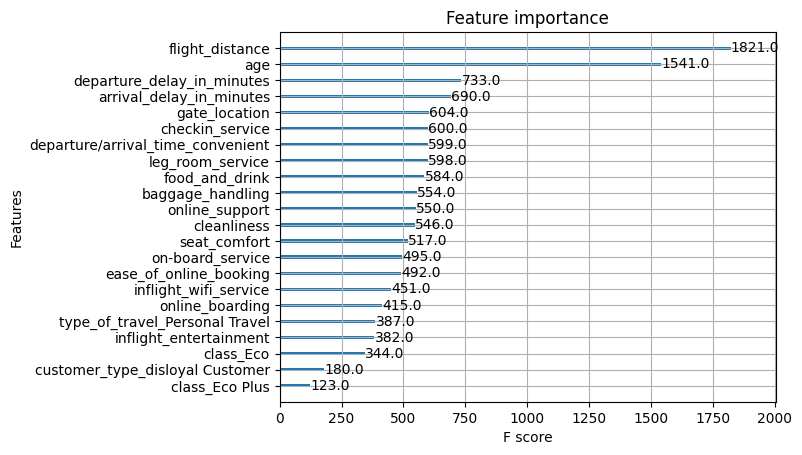

In [114]:
# plot feature importance
plot_importance(xgb_cv.best_estimator_)
plt.show()

- flight_distance and age were by a large margin the most important features in our model, with depature_delay_in_minutes and arrival_delay_in_minutes coming after.
- Surprisingly inflight_entertainment had a very low importance considering it was the most important feature in our single decision tree model.

Further investigation into why this is the case may be necessary e.g seeking more information from domain experts.

### Compare models

Create a table of results to compare model performance.

In [113]:
# create table of results to compare model performance.

table = pd.DataFrame({'Model': ["XGBoost", "Tuned XGBoost"],
                      'Accuracy': [accuracy_1, accuracy_2],
                      'Recall': [recall_1, recall_2],
                      'Precision': [precision_1, precision_2],
                      'F1': [f1_1, f1_2]
                     }
                    )
table

,Model,Accuracy,Recall,Precision,F1
0,XGBoost,95.37,94.95,96.54,95.74
1,Tuned XGBoost,95.59,95.03,96.87,95.94


The table shows very similar performances for both XGBoost and Tuned XGBoost models, with both models performing well for each metric considered. However, the Tuned XGBoost model does perform slightly better than the original model. Depending on the use case of our model they might be no merit to dedicating resources attempting to further tune our original model.